      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

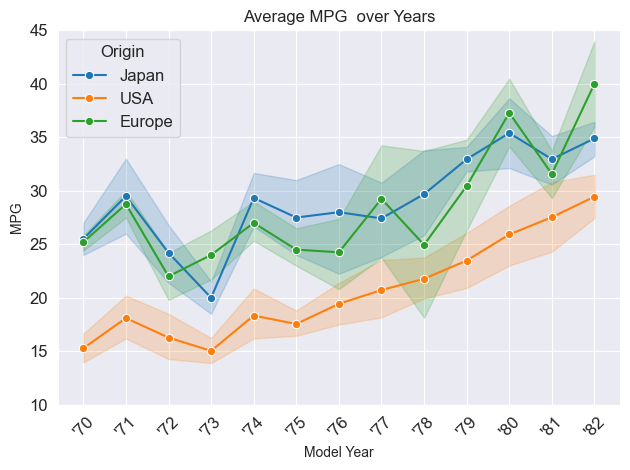

In [1]:
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp


cars =pd.read_csv(r"C:\Users\user\Downloads\Cars.csv ")
print(cars)

cars_data = pd.DataFrame(cars)

cars_data.shape

cars_data.columns

cars_data.set_index('name', inplace = True)



unique_values = cars_data['mpg'].unique()

cars_data['horsepower/weight'] = cars_data['horsepower']/cars_data['weight']


#Quiz wala part


max_hp = cars_data[cars_data['horsepower'] == cars_data['horsepower'].max()]


cars_data[cars_data['mpg']>=35]



print(cars_data[(cars_data['horsepower']>100) & (cars_data['weight']<3000)])

cars_japan= cars_data[cars_data['origin']=='japan']
cars_japan
print(f"{cars_japan['acceleration'].mean():.2f}")
print(cars_data['mpg'].max())
print(cars_data['mpg'].median())
newcars_data= cars_data[cars_data['mpg']>23.0]
print(newcars_data['horsepower/weight'].max())
cars_usa= cars_data[cars_data['origin']=='USA']
cars_europe= cars_data[cars_data['origin']=='Europe']

multi_year_models = cars_data.groupby("name").filter(lambda x: x["model_year"].nunique() >= 2)


consistency = multi_year_models.groupby("name").agg(
    appearances=("mpg", "size"),
    std_mpg=("mpg", "std"),
    avg_mpg=("mpg", "mean")
).reset_index()


consistent_models = consistency[
    (consistency["std_mpg"] < 1.0) & 
    (consistency["appearances"] >= 2)
].sort_values(
    by=["appearances", "avg_mpg"], 
    ascending=[False, False]
)


print(consistent_models[["name", "appearances", "avg_mpg", "std_mpg"]])




   

sns.set_style('darkgrid')
cars_japan = cars[cars["origin"] == "japan"]
cars_usa = cars[cars["origin"] == "usa"]
cars_europe = cars[cars["origin"] == "europe"]

sns.lineplot(x="model_year", y="mpg", data=cars_japan, label="Japan", marker="o",)
sns.lineplot(x="model_year", y="mpg", data=cars_usa, label="USA", marker="o")
sns.lineplot(x="model_year", y="mpg", data=cars_europe, label="Europe", marker="o")

mp.title("Average MPG  over Years")
mp.xlabel("Model Year")
mp.ylabel("MPG")


mp.xticks(
    range(70, 83), 
    [f"'70", "'71", "'72", "'73", "'74", "'75", "'76", "'77", "'78", "'79", "'80", "'81", "'82"],
    rotation=45,
    fontsize=12
)


mp.yticks(range(10, 50, 5), fontsize=12)  
mp.ylim(10, 45)  


mp.legend(
    title="Origin", 
    title_fontsize=12,
    fontsize=12,
loc='upper left'
)


mp.tight_layout()
mp.show()